# Probabilistic Generative Models

* So far we have focused on regression.  We will begin to discuss classification. 
* Suppose we have training data from two classes, $C_1$ and $C_2$, and we would like to train a classifier to assign a label to incoming test points whether they belong to class 1 or 2.  
* There are *many* classifiers in the machine learning literature.  We will cover a few in this class.  Today we will focus on probabilistic generative approaches for classification. 
* A *generative* approach for classification is one in which we estimate the parameters for distributions that generate the data for each class.  Then, when we have a test point, we can compute the posterior probability of that point belonging to each class and assign the point to the class with the highest posterior probability.  

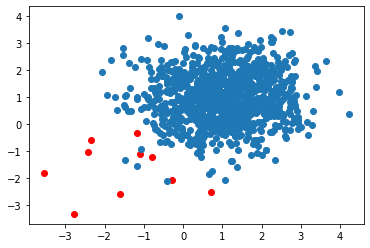

In [11]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
%matplotlib inline  

mean1 = [-1.5, -1]
mean2 = [1, 1]
cov1 = [[1,0], [0,1]]
cov2 = [[1,0],[0,1]]
N1 = 10
N2 = 1000

def generateData(mean1, mean2, cov1, cov2, N1=100, N2=100):
    # We are generating data from two Gaussians to represent two classes. 
    # In practice, we would not do this - we would just have data from the problem we are trying to solve. 
    class1X = np.random.multivariate_normal(mean1, cov1, N1)
    class2X = np.random.multivariate_normal(mean2, cov2, N2)
    
    fig = plt.figure()
    ax = fig.add_subplot(*[1,1,1])
    ax.scatter(class1X[:,0], class1X[:,1], c='r') 
    ax.scatter(class2X[:,0], class2X[:,1]) 
    plt.show()
    return class1X, class2X
    
class1X, class2X = generateData(mean1, mean2,cov1,cov2, N1,N2)

In the data we generated above, we have a "red" class and a "blue" class.  When we are given a test sample, we will want to assign the label of either red or blue.  

We can compute the posterior probability for class $C_1$ as follows:

\begin{eqnarray}
p(C_1 | x) &=& \frac{p(x|C_1)p(C_1)}{p(x)}\\
           &=& \frac{p(x|C_1)p(C_1)}{p(x|C_1)p(C_1) + p(x|C_2)p(C_2)}\\
\end{eqnarray}

We can similarly compute the posterior probability for class $C_2$: 

\begin{eqnarray}
p(C_2 | x) &=& \frac{p(x|C_2)p(C_2)}{p(x|C_1)p(C_1) + p(x|C_2)p(C_2)}\\
\end{eqnarray}

Note that $p(C_1|x) + p(C_2|x) = 1$. 

So, to train the classifier, what we need is to determine the parametric forms and estimate the parameters for $p(x|C_1)$, $p(x|C_2)$, $p(C_1)$ and $p(C_2)$. 

For example, we can assume that the data from both $C_1$ and $C_2$ are distributed according to Gaussian distributions.  In this case,
\begin{eqnarray}
p(\mathbf{x}|C_k) = \frac{1}{(2\pi)^{d/2}}\frac{1}{|\Sigma|^{1/2}}\exp\left\{ - \frac{1}{2} (\mathbf{x}-\mu_k)^T\Sigma_k^{-1}(\mathbf{x}-\mu_k)\right\}
\end{eqnarray}

Given the assumption of the Gaussian form, how would you estimate the parameter for $p(x|C_1)$ and $p(x|C_2)$?  *You can use maximum likelihood estimate for the mean and covariance!* 

The MLE estimate for the mean of class $C_k$ is: 
\begin{eqnarray}
\mu_{k,MLE} = \frac{1}{N_k} \sum_{n \in C_k} \mathbf{x}_n
\end{eqnarray}
where $N_k$ is the number of training data points that belong to class $C_k$

The MLE estimate for the covariance of class $C_k$ is: 
\begin{eqnarray}
\Sigma_{k,MLE} = \frac{1}{N_k} \sum_{n \in C_k} (\mathbf{x}_n - \mu_{k,MLE})(\mathbf{x}_n - \mu_{k,MLE})^T
\end{eqnarray}

We can determine the values for $p(C_1)$ and $p(C_2)$ from the number of data points in each class:
\begin{eqnarray}
p(C_k) = \frac{N_k}{N}
\end{eqnarray}
where $N$ is the total number of data points. 



In [2]:
#Estimate the mean and covariance for each class from the training data
mu1 = np.mean(class1X, axis=0)
print(mu1)

cov1 = np.cov(class1X.T)
print(cov1)

mu2 = np.mean(class2X, axis=0)
print(mu2)

cov2 = np.cov(class2X.T)
print(cov2)

# Estimate the prior for each class
pC1 = class1X.shape[0]/(class1X.shape[0] + class2X.shape[0])
print(pC1)

pC2 = class2X.shape[0]/(class1X.shape[0] + class2X.shape[0])
print(pC2)

[-1.1473302  -0.46626619]
[[ 1.12083727 -0.42203359]
 [-0.42203359  0.52352469]]
[1.03814113 0.94636771]
[[ 0.95970944 -0.01135675]
 [-0.01135675  0.9815481 ]]
0.009900990099009901
0.9900990099009901


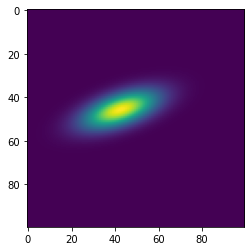

In [3]:
#We now have all parameters needed and can compute values for test samples
from scipy.stats import multivariate_normal

x = np.linspace(-5, 4, 100)
y = np.linspace(-6, 6, 100)
xm,ym = np.meshgrid(x, y)
X = np.dstack([xm,ym])

#look at the pdf for class 1
y1 = multivariate_normal.pdf(X, mean=mu1, cov=cov1)
plt.imshow(y1)


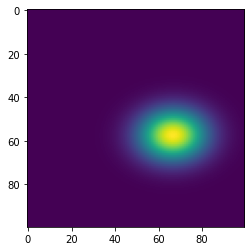

In [4]:
#look at the pdf for class 2
y2 = multivariate_normal.pdf(X, mean=mu2, cov=cov2);
plt.imshow(y2)

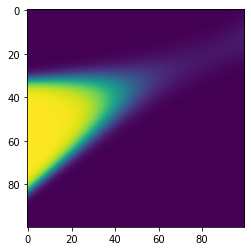

In [5]:
#Look at the posterior for class 1
pos1 = (y1*pC1)/(y1*pC1 + y2*pC2 );
plt.imshow(pos1)

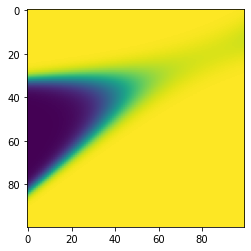

In [6]:
#Look at the posterior for class 2
pos2 = (y2*pC2)/(y1*pC1 + y2*pC2 );
plt.imshow(pos2)

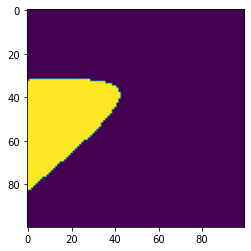

In [7]:
#Look at the decision boundary
plt.imshow(pos1>pos2)

*How did we come up with using the MLE solution for the mean and variance? How did we determine how to compute $p(C_1)$ and $p(C_2)$?

* We can define a likelihood for this problem and maximize it!

\begin{eqnarray}
p(\mathbf{t}, \mathbf{X}|\pi, \mu_1, \mu_2, \Sigma_1, \Sigma_2) = \prod_{n=1}^N \left[\pi N(x_n|\mu_1, \Sigma_1)\right]^{t_n}\left[(1-\pi)N(x_n|\mu_2, \Sigma_2) \right]^{1-t_n}
\end{eqnarray}

* *How would we maximize this?* As usual, we would use our "trick" and take the log of the likelihood function.  Then, we would take the derivative with respect to each parameter we are interested in, set the derivative to zero, and solve for the parameter of interest. 